# Приоритезация гипотез

## Описание данных
hypothesis.csv:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

## Задача
- Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
- Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [1]:
# настраиваем окружение
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import ceil
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')

hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [3]:
# переименуем столбцы, чтобы проще было работать
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [4]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [5]:
# Приоритезация ICE
hypothesis['ice_score'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['ice_score'] = hypothesis['ice_score'].astype('int')
hypothesis.sort_values(by='ice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13
7,Добавить форму подписки на все основные страни...,10,7,8,5,11
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1


In [6]:
# Приоритезация RICE
hypothesis['rice_score'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis['rice_score'] = hypothesis['rice_score'].astype('int')
hypothesis.sort_values(by='rice_score', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice_score,rice_score
7,Добавить форму подписки на все основные страни...,10,7,8,5,11,112
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7,56
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13,40
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8,40
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16,16
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1,9
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2,4
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1,4
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1,3


### Вывод
Т.к. ICE и RICE методы приоритезации отличаются только одним параметров - Reach, то именно этот параметр определяет разницу в итоговых приоритетов гипотез. Те гипотезы, которые имеют высокий охват аудитории (Reach) получают более высокий приоритет при использовании RICE

# Анализ A/B-теста

## Описание данных
Файл /datasets/orders.csv:
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Задача
Проанализируйте A/B-тест

### Подготовка данных

In [8]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [9]:
# исправим тип колонки
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
# переименуем столбцы
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transaction_id    1197 non-null int64
visitor_id        1197 non-null int64
date              1197 non-null datetime64[ns]
revenue           1197 non-null int64
group             1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
# исправим тип колонки
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


### 1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения

In [12]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [13]:
# куммулятивные данные по заказам
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                                     orders['group'] == x['group']
                                                                    )
                                                     ]
                                     .agg({'date' : 'max', 
                                           'group' : 'max', 
                                           'transaction_id' : pd.Series.nunique, 
                                           'visitor_id' : pd.Series.nunique, 
                                           'revenue' : 'sum'}
                                         ), axis=1
                                    ).sort_values(by=['date','group'])

In [14]:
ordersAggregated.columns = ['date', 'group', 'orders', 'buyers', 'revenue']
ordersAggregated.head()

,date,group,orders,buyers,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


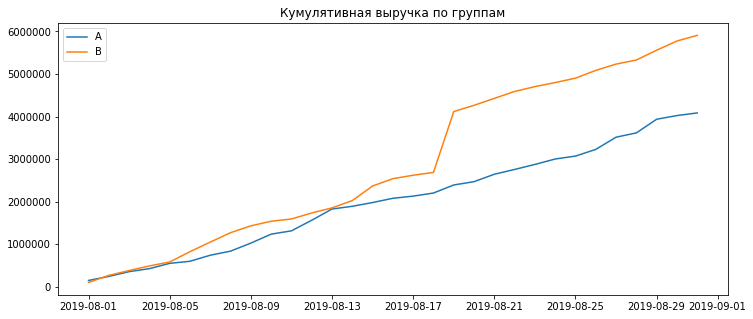

In [15]:
ordersAggregatedA = ordersAggregated.query('group == "A"')
ordersAggregatedB = ordersAggregated.query('group == "B"')

plt.figure(figsize=(12,5))
plt.plot(ordersAggregatedA['date'], ordersAggregatedA['revenue'], label='A')
plt.plot(ordersAggregatedB['date'], ordersAggregatedB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.legend()
plt.show()

В первую неделю выручка по группам практически не различается, затем выручка по группе B начинает расти относительно группы A (период с 05.08.2019 по 17.08.209). Затем следует резкое увеличение выручки по группе B - возможно, заказ на большую сумму и затем рост в группе B прекращается.

### 1.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

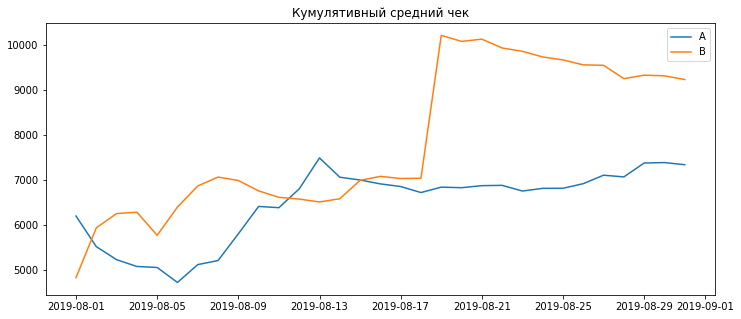

In [16]:
plt.figure(figsize=(12,5))
plt.plot(ordersAggregatedA['date'], ordersAggregatedA['revenue']/ordersAggregatedA['orders'], label='A')
plt.plot(ordersAggregatedB['date'], ordersAggregatedB['revenue']/ordersAggregatedB['orders'], label='B')
plt.legend()
plt.title('Кумулятивный средний чек')
plt.show()

До 15.03.2019 средний чек по группам вел себя по разному, но в итоге сравнялся. Затем резкий рост в группе В, который мы уже видели на куммулятивной выручке и затем стабилизация трендов. Но если в группе В наблюдалось небольшое снижение, то в группе А - небольшой рост.

### 1.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

In [17]:
ordersRevenue = pd.merge(ordersAggregatedA, ordersAggregatedB, on='date', how='left', suffixes=['A', 'B'])
ordersRevenue.head()

,date,groupA,ordersA,buyersA,revenueA,groupB,ordersB,buyersB,revenueB
0,2019-08-01,A,24,20,148579,B,21,20,101217
1,2019-08-02,A,44,38,242401,B,45,43,266748
2,2019-08-03,A,68,62,354874,B,61,59,380996
3,2019-08-04,A,84,77,425699,B,78,75,489567
4,2019-08-05,A,109,100,549917,B,101,98,581995


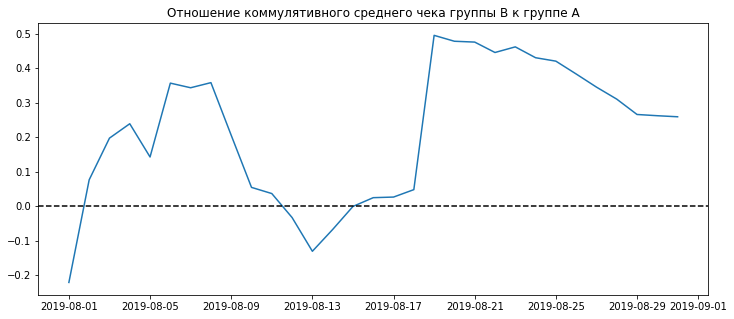

In [18]:
# отношение средних чеков
plt.figure(figsize=(12,5))
plt.plot(ordersRevenue['date'], 
         (ordersRevenue['revenueB'] / ordersRevenue['ordersB']) / (ordersRevenue['revenueA']  /ordersRevenue['ordersA']) -1 
        )
plt.title('Отношение коммулятивного среднего чека группы В к группе А')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График резко меняет тренд в нескольких точках - можно предположить наличие выбросов в данных (крупных заказов) в эти даты

### 1.4 Постройте график кумулятивной конверсии по группам. Сделайте выводы и предположения.

In [19]:
# куммулятивные данные по посетителям
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                         visitors['group'] == x['group']
                                                                        )
                                                         ].agg({'date' : 'max', 
                                                                'group' : 'max', 
                                                                'visitors' : 'sum'}
                                                              ), axis=1
                                      ).sort_values(by=['date','group'])

In [20]:
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [21]:
cumulativeData = pd.merge(ordersAggregated, visitorsAggregated, on=['group', 'date'])
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


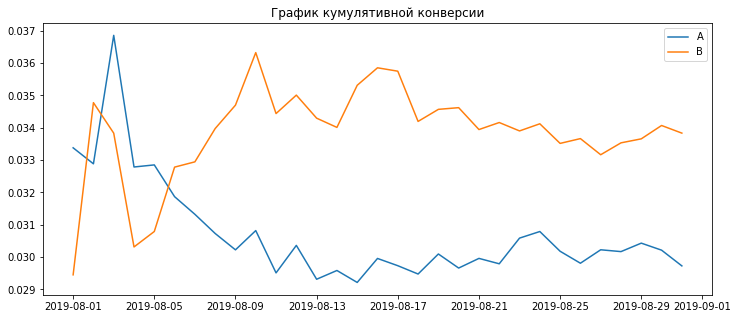

In [22]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(12,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График кумулятивной конверсии')
plt.legend()

Ближе к концу периода колебания в группах затихают. В группе В конверсия выше группы А.
Резкие изменения на графике говорят о резком изменении числа заказов или посетителей в эти даты.

### 1.5 Постройте график относительного изменения кумулятивной конверсии группы B к группе A. Сделайте выводы и предположения.

In [24]:
ordersConversions = pd.merge(cumulativeDataA[['date','conversion']], 
                             cumulativeDataB[['date','conversion']], 
                             on='date', 
                             how='left', suffixes=['A', 'B']
                            )

ordersConversions.head()

,date,conversionA,conversionB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


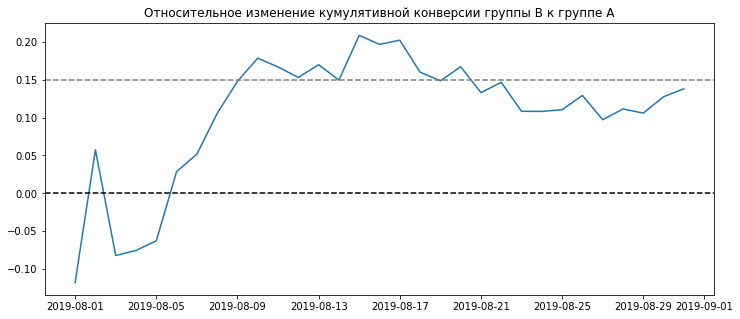

In [25]:
plt.figure(figsize=(12,5))

plt.plot(ordersConversions['date'], 
         ordersConversions['conversionB'] / ordersConversions['conversionA'] - 1 
        )
plt.title('Относительное изменение кумулятивной конверсии группы В к группе А')

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

### 1.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [26]:
# сгруппируем заказы по покупателям без учета групп
ordersGrouped = orders.groupby('visitor_id').agg({'transaction_id':'nunique'})
ordersGrouped.head()

,transaction_id
visitor_id,
5114589,1
6958315,1
8300375,2
11685486,1
39475350,1


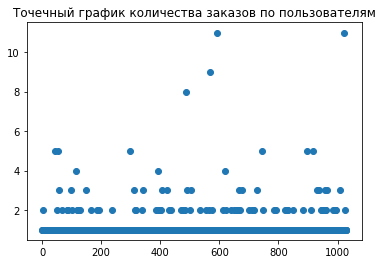

In [27]:
x_values = pd.Series(range(0, 
                           len(ordersGrouped['transaction_id'])
                          )
                    )

plt.scatter(x_values, ordersGrouped['transaction_id'])
plt.title('Точечный график количества заказов по пользователям')
plt.show()

Судя по графику "нормальным" кол-вом заказов на одного пользователя можно считать значения от 0 до 5. Значения больше уже похожи на выбросы

### 1.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [28]:
print(np.percentile(ordersGrouped['transaction_id'], [95, 99]))
order_threshold = np.percentile(ordersGrouped['transaction_id'], [99])[0]

[2. 4.]


Кол-во заказов на пользователя больше 4 (99-й перцинтиль) будем считать аномальными значениями

### 1.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

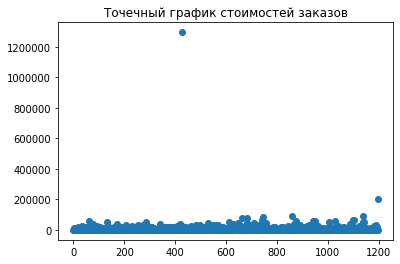

In [29]:
x_values = pd.Series(range(0, 
                           len(orders['revenue'])
                          )
                    )

plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

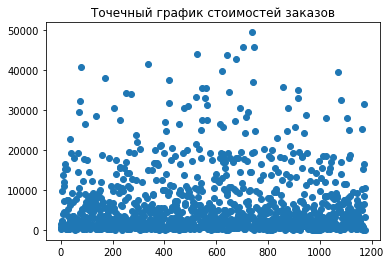

In [30]:
# на таком масштабе мало что понятно
x_values = pd.Series(range(0, 
                           len(orders.query('revenue < 50000')['revenue'])
                          )
                    )

plt.scatter(x_values, orders.query('revenue < 50000')['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.show()

Заказов стоимостью до 40 000 заметно больше чем остальных

### 1.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [31]:
print(np.percentile(orders['revenue'], [95, 99]))
revenue_threshold = np.percentile(orders['revenue'], [99])[0]

[28000.  58233.2]


Значение 99-го перцинтиля будем использовать для отсечения аномальных по стоимости заказов

### 1.10 Посчитайте статистическую значимость различий в конверсии между группами по «сырым» данным. Сделайте выводы и предположения.

In [32]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
ordersByUsersB.columns = ['user_id', 'orders']

In [33]:
visitorsA = visitors.query('group == "A"')[['date', 'visitors']]
visitorsB = visitors.query('group == "B"')[['date', 'visitors']]

In [34]:
print('Кол-во посетителей в группах\n', 
      'группа А: ', visitorsA['visitors'].sum(), '\n', 
      'группа В: ', visitorsB['visitors'].sum())

visitorsA.head()

Кол-во посетителей в группах
 группа А:  18736 
 группа В:  18916


,date,visitors
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


In [35]:
sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders'
                              )
                    ],axis=0
                   )

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders'
                              )
                    ],axis=0
                   )

In [36]:
print('Кол-во значений в выборках (сырые данные) для применения критерия Манна-Уитни:\n',
     'выборка А: ', sampleA.shape[0], '\n',
     'выборка В: ', sampleB.shape[0])

Кол-во значений в выборках (сырые данные) для применения критерия Манна-Уитни:
 выборка А:  18736 
 выборка В:  18916


In [37]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(sampleA, sampleB)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.008396177528376304
Отвергаем нулевую гипотезу: разница статистически значима


Критерий Манна-Уитни показывает, что существует статистически значимая разница в конверсии по сырым данным для групп А и В.

### 1.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

In [38]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                          orders[orders['group']=='B']['revenue']
                         )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.3646454927716229
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Для среднего чека заказа по сырым данным отсутствует статистически значимая разница между группами А и В.

### 1.12 Посчитайте статистическую значимость различий в конверсии между группами по «очищенным» данным. Сделайте выводы и предположения.

In [39]:
print('Пороговое значение для определения аномального кол-ва заказов на одного пользователя: ', order_threshold)
print('Пороговое значение для определения аномальной стоимости одного заказа: {:.2f}'.format(revenue_threshold))

Пороговое значение для определения аномального кол-ва заказов на одного пользователя:  4.0
Пороговое значение для определения аномальной стоимости одного заказа: 58233.20


In [40]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > order_threshold]['user_id'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > order_threshold]['user_id']
                                ], axis = 0
                               )

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_threshold]['visitor_id']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], 
                          axis = 0
                         ).drop_duplicates().sort_values()

print(abnormalUsers.head())
print('Кол-во аномальных пользователей в выборке:', abnormalUsers.shape[0])

1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
Кол-во аномальных пользователей в выборке: 15


In [41]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visitorsA['visitors'].sum() - len(ordersByUsersA['orders'])),
                                       name='orders')
                            ],axis=0
                           )

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
                             pd.Series(0, index=np.arange(visitorsB['visitors'].sum() - len(ordersByUsersB['orders'])),
                                       name='orders')],axis=0)

In [42]:
print('Кол-во значений в выборках (очищенные данные) для применения критерия Манна-Уитни:\n',
     'выборка А: ', sampleAFiltered.shape[0], '\n',
     'выборка В: ', sampleBFiltered.shape[0])

Кол-во значений в выборках (очищенные данные) для применения критерия Манна-Уитни:
 выборка А:  18725 
 выборка В:  18906


In [43]:
results = st.mannwhitneyu(sampleAFiltered, 
                          sampleBFiltered
                         )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.007190067792654007
Отвергаем нулевую гипотезу: разница статистически значима


Критерий Манна-Уитни показывает, что для очищенных от выбросов данных также есть статистически значимая разница в конверсии между группами А и В.

### 1.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

In [44]:
ordersAFiltered = orders[np.logical_and(
                                         orders['group']=='A',
                                         np.logical_not(orders['visitor_id'].isin(abnormalUsers))
                                        )
                        ]['revenue']

ordersBFiltered = orders[np.logical_and(
                                        orders['group']=='B',
                                        np.logical_not(orders['visitor_id'].isin(abnormalUsers))
                                        )
                        ]['revenue']

results = st.mannwhitneyu(ordersAFiltered, 
                          ordersBFiltered
                         )

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-value:  0.42545630956909697
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Критерий Манна-Уитни показывает, что для очищенных от выбросов данных нет статистически значимой разницы по среднему чеку между группами А и В.

### 1.14 Примите решение по результатам теста и объясните его. 
Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

## Результаты теста
- кумулятивная выручка по группе В выше выручки по группе А
- график кумулятивного среднего чека показывает, что чек в группе В чем в группе А, но это из-за наличия аномальных в заказов в группе В. График относительного изменения среднего чека показывает, что при продолжении теста, скорее всего, относительное изменение будет равно 0. 
- кумулятивная конверсия по группе В выше. График показывает, что к клнцу теста колебания значений конверсии в группах затихают, но конверсия в группе В стабильно выше. Это подтверждает график относительного изменения конверсии.
- существует статистически значимая разница в конверсии по группам как на сырых данных так и после удаления аномальных данных.
- отсутствует статистически значимая разница для среднего чека по группам

__Тест следует остановить и зафиксировать победу группы В. Выручка и конверсия в группе В выше чем в группе А__